<a href="https://colab.research.google.com/github/Pavitrakumar45/Bank/blob/main/Bank_Telemarketing_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# DATA MANIPULATION LIBRARY
import pandas as pd
import numpy as np

# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import Filter warning libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Libraries
import logging
logging.basicConfig(level = logging.INFO,
                   format = '%(asctime)s - %(levelname)s - %(message)s',
                   filemode = 'w',
                   filename = 'model.log',force = True)

# Import Sci-kit Learn
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
# Importing Metrics for Classification Model
from sklearn.metrics import accuracy_score,confusion_matrix


In [4]:
# Importing Dataset using pandas function

df = pd.read_csv('bank.csv', sep = ';')

df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3528,46,management,divorced,tertiary,no,225,yes,no,cellular,14,may,201,1,345,1,other,no
2537,26,blue-collar,married,primary,no,5116,yes,no,cellular,22,jul,246,3,-1,0,unknown,no
660,36,technician,divorced,secondary,no,666,yes,yes,cellular,3,apr,190,1,133,1,other,no
4258,29,management,single,tertiary,no,5980,yes,no,unknown,28,may,317,1,-1,0,unknown,no
4288,44,technician,divorced,secondary,no,0,no,no,cellular,28,jul,264,5,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,32,blue-collar,married,secondary,no,950,yes,yes,cellular,20,apr,219,4,-1,0,unknown,no
4017,59,self-employed,married,tertiary,no,3800,no,yes,cellular,9,jul,70,1,-1,0,unknown,no
1046,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,no
795,30,management,single,tertiary,no,162,yes,no,unknown,20,may,186,4,-1,0,unknown,no


In [5]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# Evaluate Descriptive Stats: EDA

# Step 1 : Segregate categorical comlumns and numerical columns
categorical_columns = df.select_dtypes(include = 'object')
numerical_columns = df.select_dtypes(exclude = 'object')

In [7]:
# STEP 2 : Evaluate descriptive stats

from collections import OrderedDict

stats = []

for i in numerical_columns.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Mean' :df[i].mean(),
        'Median' :df[i].median(),
        'Max'    :df[i].max(),
        'Min'    :df[i].min(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Std'    :df[i].std(),
        'Skew'   :df[i].skew(),
        'Kurtosis':df[i].kurtosis(),
        'Variance':df[i].var()

    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Mean,Median,Max,Min,Q1,Q3,IQR,Std,Skew,Kurtosis,Variance
0,age,41.170095,39.0,87,19,33.0,49.0,16.0,10.576211,0.699501,0.348775,1.118562e+02
1,balance,1422.657819,444.0,71188,-3313,69.0,1480.0,1411.0,3009.638142,6.596431,88.390332,9.057922e+06
2,day,15.915284,16.0,31,1,9.0,21.0,12.0,8.247667,0.094627,-1.039531,6.802402e+01
3,duration,263.961292,185.0,3025,4,104.0,329.0,225.0,259.856633,2.772420,12.530050,6.752547e+04
4,campaign,2.793630,2.0,50,1,1.0,3.0,2.0,3.109807,4.743914,37.168920,9.670897e+00
5,pdays,39.766645,-1.0,871,-1,-1.0,-1.0,0.0,100.121124,2.717071,7.957128,1.002424e+04
6,previous,0.542579,0.0,25,0,0.0,0.0,0.0,1.693562,5.875259,51.995212,2.868153e+00


<Axes: ylabel='count'>

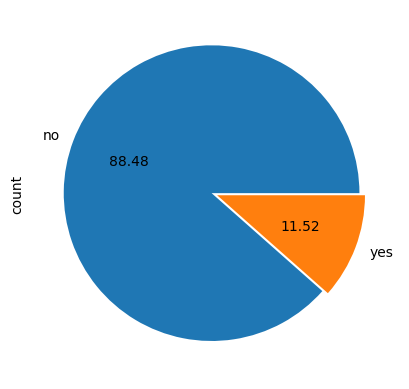

In [8]:
# Problem Definition
'''
The dataset consist of 4521 rows and 17 columns. This dataset belongs to portugal
bank where our aim is to classify whether the customer will subscribe the bank
term deposite or not,

type of machine learning model : Binary Classification

Above Dataset is a type of Multivariate Analysis.

X = Independent Columns
y = Target Column/ Dependent Column

Here , y acts as Target Column /Dependent Column.
'''

# Checking the distribution of people who subscribe the term deposite
'''
Based on distribution of target column , we found that the data is imbalance.
'''
df['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.02,0.02])

In [9]:
# Data Insights :
'''
1. 88.48% people are not subscribing bank term deposite.
2. The average call duration recorded is 264 seconds. this can be one of the cause
for the people who have not subscribe the bank term deposite.
3. If the call duration more than 300 seconds tghe chances are higher that the
person will subscribe the bank term deposite.
4. The Target audience is divorce persons.
5. The Person Who Took the loan are excluded from bank term deposit subscription.
6. The Persom Who Took the housing loan also excluded from bank term deposit subscription.

'''

'\n1. 88.48% people are not subscribing bank term deposite.\n2. The average call duration recorded is 264 seconds. this can be one of the cause\nfor the people who have not subscribe the bank term deposite.\n3. If the call duration more than 300 seconds tghe chances are higher that the\nperson will subscribe the bank term deposite.\n4. The Target audience is divorce persons.\n5. The Person Who Took the loan are excluded from bank term deposit subscription.\n6. The Persom Who Took the housing loan also excluded from bank term deposit subscription.\n\n'

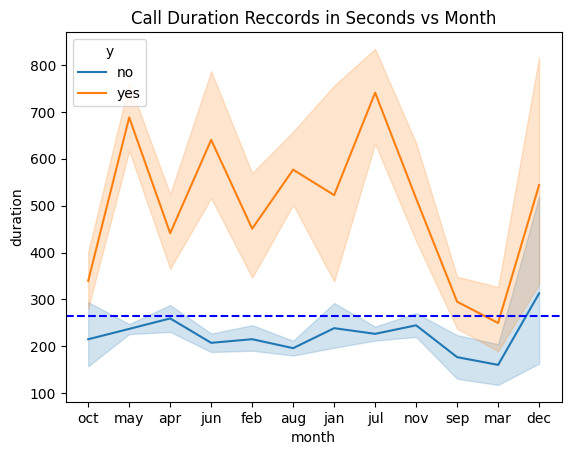

In [10]:
sns.lineplot(x = df['month'], y = df['duration'], hue = df['y'])
plt.axhline(df['duration'].mean(), linestyle = '--',c = 'b')
plt.title('Call Duration Reccords in Seconds vs Month')
plt.show()

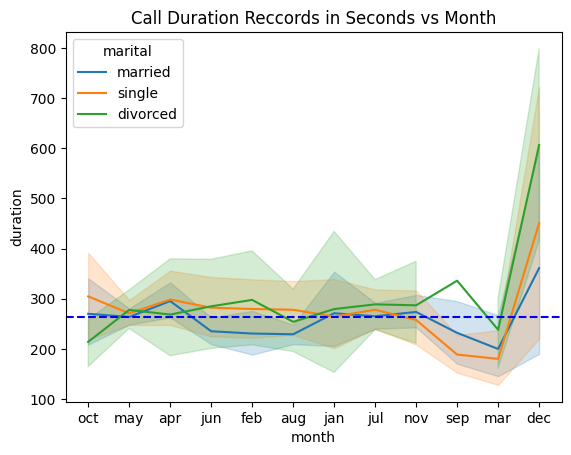

In [11]:
sns.lineplot(x = df['month'], y = df['duration'], hue = df['marital'])
plt.axhline(df['duration'].mean(), linestyle = '--',c = 'b')
plt.title('Call Duration Reccords in Seconds vs Month')
plt.show()

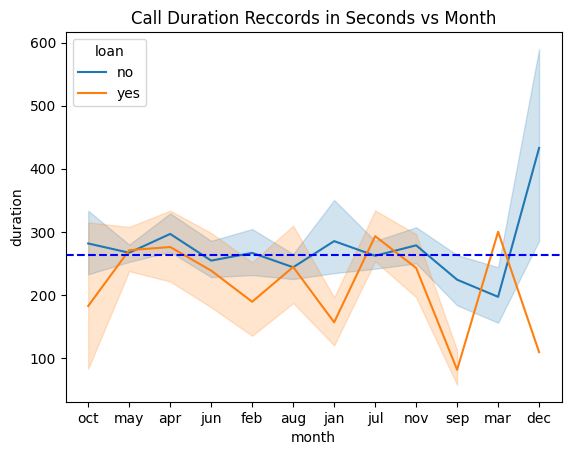

In [12]:
sns.lineplot(x = df['month'], y = df['duration'], hue = df['loan'])
plt.axhline(df['duration'].mean(), linestyle = '--',c = 'b')
plt.title('Call Duration Reccords in Seconds vs Month')
plt.show()

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

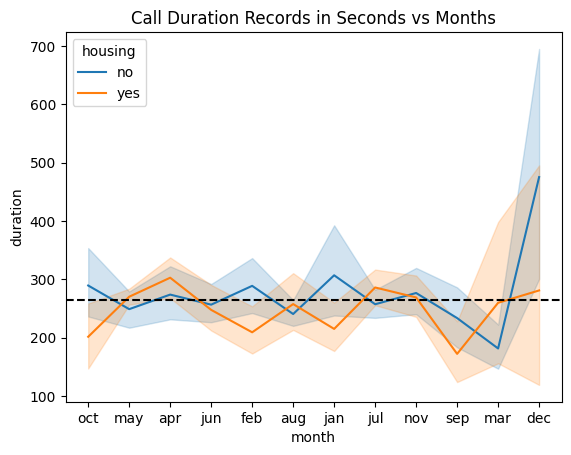

In [13]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['housing'])
plt.axhline(df['duration'].mean(),linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

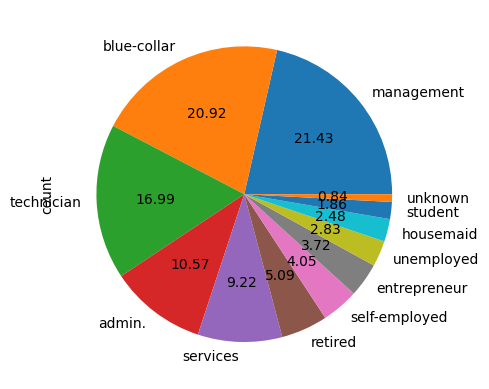

In [14]:
df['job'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.show()

In [15]:
management = df[df['job']== 'management']
bluecollar = df[df['job']== 'blue-collar']


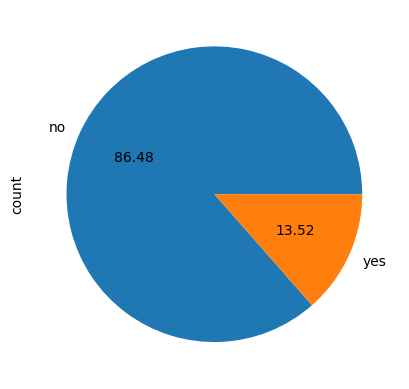

In [16]:
management['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.show()

<Axes: ylabel='balance'>

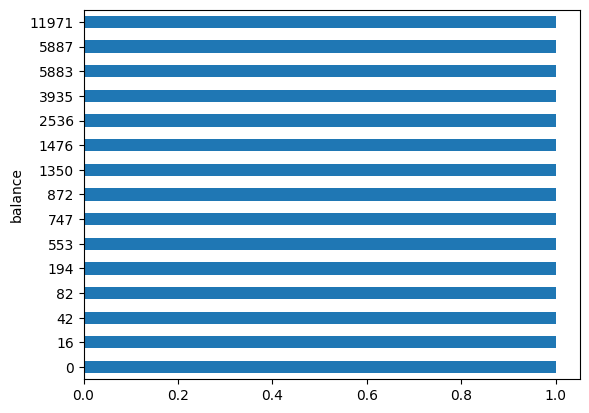

In [17]:
management['balance'][:15].sort_values(ascending=True).value_counts().plot(kind='barh')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

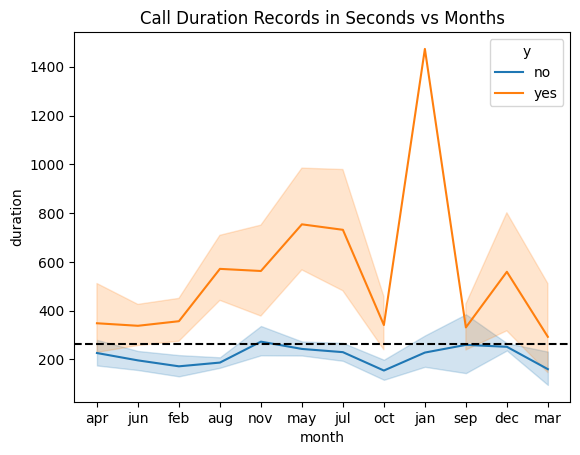

In [18]:
sns.lineplot(x=management['month'],y=management['duration'],hue=management['y'])
plt.axhline(264,linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

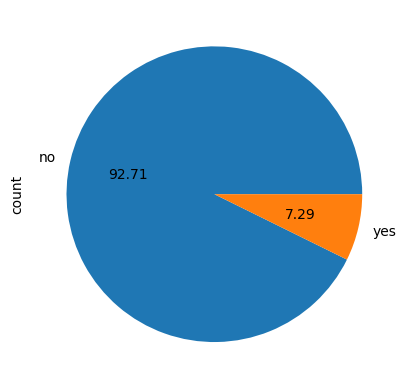

In [19]:
bluecollar['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.show()

<Axes: ylabel='balance'>

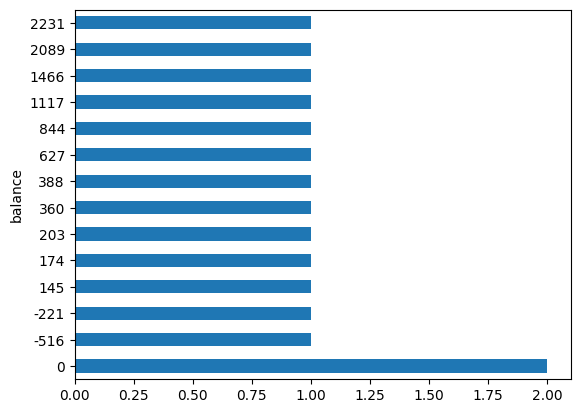

In [20]:
bluecollar['balance'][:15].sort_values(ascending=True).value_counts().plot(kind='barh')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

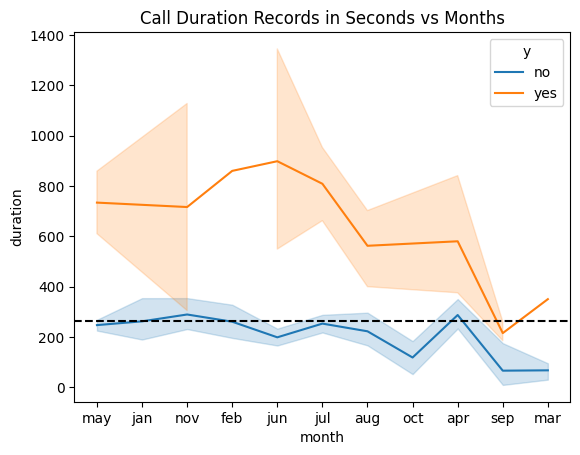

In [21]:
sns.lineplot(x=bluecollar['month'],y=bluecollar['duration'],hue=bluecollar['y'])
plt.axhline(264,linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

In [22]:
technichian = df[df['job']== 'technician']
admin = df[df['job']== 'admin.']

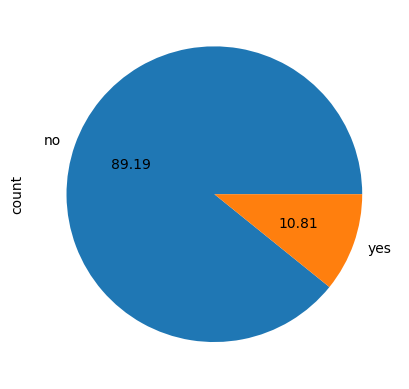

In [23]:
technichian['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.show()

<Axes: ylabel='balance'>

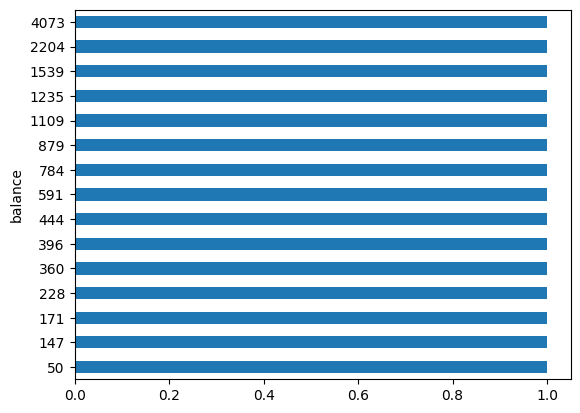

In [24]:
technichian['balance'][:15].sort_values(ascending=True).value_counts().plot(kind='barh')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

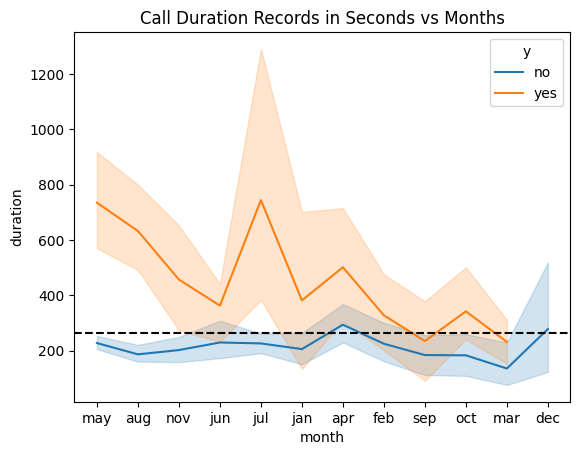

In [25]:
sns.lineplot(x=technichian['month'],y=technichian['duration'],hue=technichian['y'])
plt.axhline(264,linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

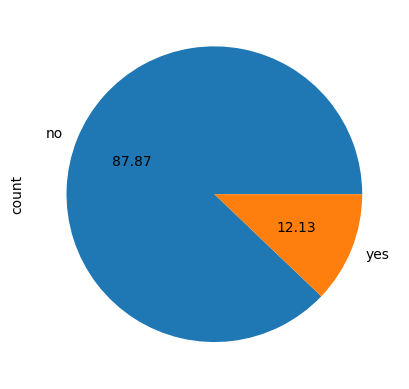

In [26]:
admin['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.show()


<Axes: ylabel='balance'>

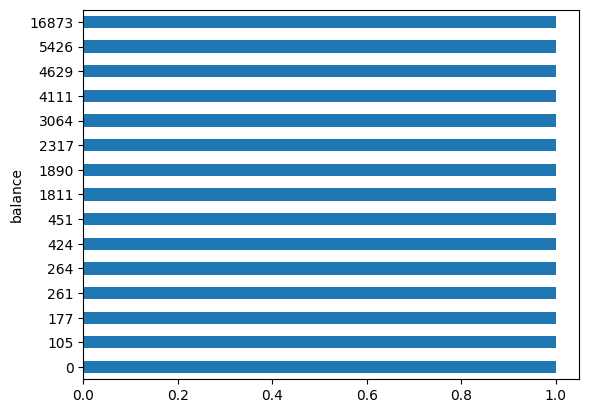

In [27]:
admin['balance'][:15].sort_values(ascending=True).value_counts().plot(kind='barh')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

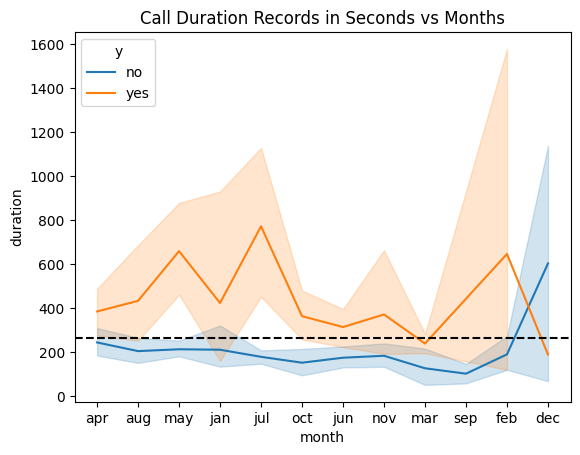

In [28]:
sns.lineplot(x=admin['month'],y=admin['duration'],hue=admin['y'])
plt.axhline(264,linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')


In [29]:
'''
1. pdays and previous these two columns shows IQR = 0 , HENCE  we need to drop
 these two columns from the dataset.

'''
# Create a copy of df
data = df.copy()
data.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1854,34,management,single,tertiary,no,2646,no,no,cellular,14,apr,142,1,-1,0,unknown,yes
471,55,self-employed,married,secondary,no,-196,yes,no,unknown,20,may,210,2,-1,0,unknown,no
1033,29,technician,single,secondary,no,534,yes,no,cellular,18,may,382,1,-1,0,unknown,no
3271,36,blue-collar,married,secondary,no,4438,yes,no,unknown,20,may,446,1,-1,0,unknown,yes
1241,22,student,single,unknown,no,549,no,no,cellular,2,sep,154,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,34,management,single,tertiary,no,4348,yes,no,cellular,28,aug,373,8,-1,0,unknown,no
403,48,retired,married,primary,yes,-285,no,yes,cellular,19,nov,157,1,-1,0,unknown,no
1405,37,blue-collar,married,primary,no,37,yes,no,cellular,13,may,24,2,362,1,other,no
4447,49,blue-collar,single,primary,no,2146,yes,no,cellular,7,may,1516,2,353,2,other,yes


In [31]:
# Encoding using get_dummies method
'''
Observation:
1. the number of columns are increased , which impact badly w.r.t Model Building
'''
data = pd.get_dummies(data,drop_first = True , dtype = 'int')
data


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
# Encoding Technique : Label Encoder
'''
1. Independent Columns are encoded directly using LabelEncoder
2. Target Columns must be decoded separately either by using replace function or
map function.


'''

preprocess_data = df.copy()
preprocess_data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Transforming all categorical columns : Independent Columns

df['job' ] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

# Transform Target Column to numerical
df['y'] = df['y'].replace({'no':0,'yes':1})
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,14,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,16,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,11,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,40,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,38,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,38,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,9,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [43]:
# Concept of Data Leakage
'''
Step 1 : Split the dataset into X and y
        X = Independent Columns
        y = Target Column

Step 2: Split the data into train and test
        train data : seen data
        test data : unseen data

Step 3: Try Balance the target columns in case of Classification Problem
        Imbalance Technique : 1. Oversampling 2. Undersampling

Step 4: Use Scaling Technique:
        1. MinMax Scaler
        2. Robust Scaler
        3. Standard Scaler

Step 5: Model Building

'''

# Step 1 : Split the Dataset into X and y

X = df.drop(columns = ['pdays','previous','y'], axis = 1)
y = df['y']

# Split The dataset into Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)


# Step 3 : Balancing The Target Column
from imblearn.over_sampling import SMOTE,ADASYN,SMOTEN
from imblearn.under_sampling import ClusterCentroids

sm = SMOTE(random_state = 42)
X_train,y_train = sm.fit_resample(X_train,y_train)


# Step 4 : Scaling Technique
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
